In [10]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from datetime import datetime
import matplotlib.pyplot as plt

In [11]:
#Set the VIX tickers in a list
start = datetime.today()
symbols_list = ['^VIX9D', '^VIX', '^VIX3M', '^VIX6M', '^VIX1Y']
start = datetime.date(start)

In [12]:
# create an empty array to store prices
symbols = []

#pull the prices for each symbol in the list
for ticker in symbols_list:
    r = web.get_data_yahoo(ticker, start)
    #Add a column called "Symbol" where you will store the ticker
    r['Symbol'] = ticker
    symbols.append(r)

In [13]:
# concatenate the symbols array into a dataframe called 'df'
df = pd.concat(symbols)
df = df.reset_index()
#Remove the data that is not under the following headings:
df = df[['Adj Close', 'Symbol']]
df.set_index('Symbol', inplace=True)
df.head()
#gives us a table with the following format

vix9d = df['Adj Close'][0]
vix = df['Adj Close'][1]
vix3m = df['Adj Close'][2]
vix6m = df['Adj Close'][3]
vix1y = df['Adj Close'][4]

In [14]:
vix9dVix = round(vix9d/vix,2)
vixVix3m = round(vix/vix3m,2)
vix3mVix6m = round(vix3m/vix6m,2)
vix6mVix1y = round(vix6m/vix1y,2)

Contango9DVix = round((vix-vix9d)/vix9d*100,2)
ContangoVix3M = round((vix3m-vix)/vix*100,2)
Contango3M6M = round((vix6m-vix3m)/vix3m*100,2)
Contango6M1Y = round((vix1y-vix6m)/vix6m*100,2)

VIX9D = $23.41
VIX 1 Month = $23.58
VIX 3 Months = $26.15
VIX 6 Months = $27.39
VIX 1 Year = $27.88


VIX9D Contango = 0.73%
VIX Contango = 10.9%
VIX3M Contango = 4.74%
VIX6m Contango = 1.79%


VIX9D:VIX Ratio = 0.99
VIX:VIX3M Ratio = 0.9
VIX3M:VIX6M Ratio = 0.95
VIX6m:VIX1Y Ratio = 0.98


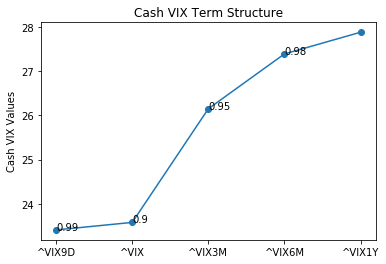

In [19]:
print(f'VIX9D = ${round(vix9d,2)}\nVIX 1 Month = ${round(vix,2)}\nVIX 3 Months = ${round(vix3m,2)}\nVIX 6 Months = ${round(vix6m,2)}\nVIX 1 Year = ${round(vix1y,2)}\n\n')

print(f'VIX9D Contango = {Contango9DVix}%\nVIX Contango = {ContangoVix3M}%\nVIX3M Contango = {Contango3M6M}%\nVIX6m Contango = {Contango6M1Y}%\n\n')
print(f'VIX9D:VIX Ratio = {vix9dVix}\nVIX:VIX3M Ratio = {vixVix3m}\nVIX3M:VIX6M Ratio = {vix3mVix6m}\nVIX6m:VIX1Y Ratio = {vix6mVix1y}')

plt.title('Cash VIX Term Structure')
plt.ylabel('Cash VIX Values')
plt.text('^VIX9D',df['Adj Close'][0], vix9dVix)
plt.text('^VIX',df['Adj Close'][1], vixVix3m)
plt.text('^VIX3M',df['Adj Close'][2], vix3mVix6m)
plt.text('^VIX6M',df['Adj Close'][3], vix6mVix1y)
plt.plot(df, marker='o')
